In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm

sns.set()

In [3]:
data = pd.read_csv('real_estate.csv')
data['view_map'] = data['view'].map({'No sea view':0, 'Sea view':1}) 
data

,price,size,year,view,view_map
0,234314.144,643.09,2015,No sea view,0
1,228581.528,656.22,2009,No sea view,0
2,281626.336,487.29,2018,Sea view,1
3,401255.608,1504.75,2015,No sea view,0
4,458674.256,1275.46,2009,Sea view,1
5,245050.280,575.19,2006,Sea view,1
6,265129.064,570.89,2015,Sea view,1
7,175716.480,620.82,2006,No sea view,0
8,331101.344,682.26,2018,Sea view,1
9,218630.608,694.52,2009,No sea view,0


In [4]:
data.describe()

# %49 is no sea view, not bad

,price,size,year,view_map
count,100.000000,100.000000,100.000000,100.000000
mean,292289.470160,853.024200,2012.600000,0.490000
std,77051.727525,297.941951,4.729021,0.502418
min,154282.128000,479.750000,2006.000000,0.000000
25%,234280.148000,643.330000,2009.000000,0.000000
50%,280590.716000,696.405000,2015.000000,0.000000
75%,335723.696000,1029.322500,2018.000000,1.000000
max,500681.128000,1842.510000,2018.000000,1.000000


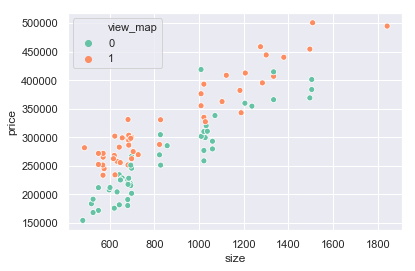

In [13]:
ax1 = sns.scatterplot(x='size', y='price', hue='view_map', palette='Set2', data=data)


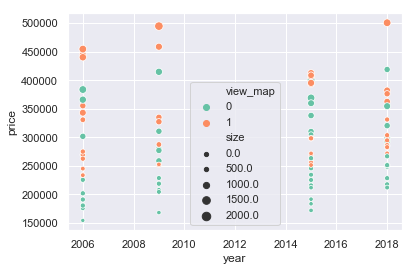

In [10]:
ax = sns.scatterplot(x='year', y='price', hue='view_map', size='size', palette='Set2', data=data)


##  lineer function

y(price) = -5398000 + 223.0316 * x1(size) + 2718.9489 * x2(year) + 56730 * x3(view)



In [17]:
# we need OLS w/ constant **for lineer regression**
y = data['price']
x = sm.add_constant(data[['size', 'year','view_map']])

results = sm.OLS(y, x).fit()
results.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.913
Model:                            OLS   Adj. R-squared:                  0.910
Method:                 Least Squares   F-statistic:                     335.2
Date:                Tue, 24 Dec 2019   Prob (F-statistic):           1.02e-50
Time:                        11:12:59   Log-Likelihood:                -1144.6
No. Observations:                 100   AIC:                             2297.
Df Residuals:                      96   BIC:                             2308.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -5.398e+06   9.94e+05     -5.431      0.000   -7.37e+06   -3.43e+06
size         223.0316      7.838     28.455      0.000     207.473     238.590
year        2718.9489    493.502      5.510      0.000    1739.356    3698.542
view_map    5.673e+04   4627.695     12.258      0.000    4.75e+04    6.59e+04
==============================================================================
Omnibus:                       29.224   Durbin-Watson:                   1.965
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               64.957
Skew:                           1.088   Prob(JB):                     7.85e-15
Kurtosis:                       6.295   Cond. No.                     9.42e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.42e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

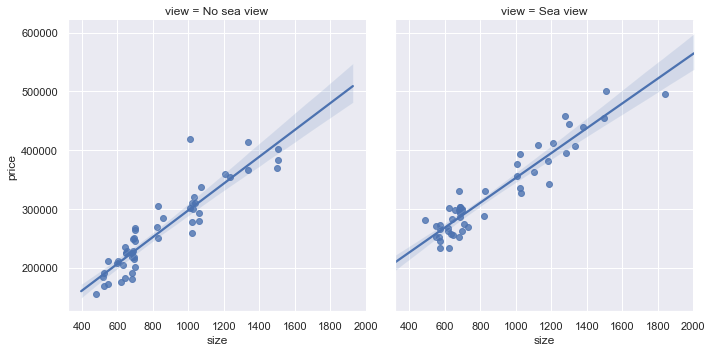

In [20]:
# sns.regplot(x="size", y="price", data=data);
sns.lmplot(x="size", y="price", col='view', data=data);
